In [1]:
import json
import os
import ast
import csv
import io
from io import StringIO, BytesIO, TextIOWrapper
import gzip
from datetime import datetime, date
from s3_utils import *
import matplotlib.pyplot as plt
import seaborn as sns
import datetime as dt
import ast
from datetime import timedelta
from tqdm import tqdm
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_auc_score, accuracy_score, f1_score, precision_score
from xgboost.sklearn import XGBClassifier, XGBRegressor
from sklearn.model_selection import cross_val_score, ShuffleSplit, KFold
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.utils import shuffle
import warnings
import sys
import time
from statsmodels.tsa.stattools import adfuller
from utils import *
from pyvis.network import Network

Matplotlib created a temporary config/cache directory at /tmp/matplotlib-jebzvlu_ because the default path (/home/ubuntu/.config/matplotlib) is not a writable directory; it is highly recommended to set the MPLCONFIGDIR environment variable to a writable directory, in particular to speed up the import of Matplotlib and to better support multiprocessing.


In [2]:

coeff_df = pd.read_csv('./GC_coeff_10-26/kalman_impute.csv')
coeff_df

,intercept,Y1L1,Y2L1,Y3L1,Y4L1,Y1L2,Y2L2,Y3L2,Y4L2,Y1L3,Y2L3,Y3L3,Y4L3,Y1L4,Y2L4,Y3L4,Y4L4
0,-0.016403,0.282076,-0.223677,-0.023396,-0.058482,0.142493,0.000000,-0.001431,0.018592,0.133862,0.000000,0.011615,0.000000,0.209967,0.060135,-0.000572,0.004905
1,0.026273,0.000000,0.518290,0.013825,0.066298,0.000000,0.071182,0.000000,0.027823,0.000000,0.203101,-0.004709,0.000000,-0.135072,-0.030334,0.016455,0.000000
2,-0.054016,-0.180817,0.000000,0.374911,-0.045652,0.025043,0.000000,0.151364,0.000000,0.000000,0.000000,0.045891,-0.025773,0.303940,0.274257,0.139802,0.000000
3,-0.015645,0.045274,0.000000,-0.023533,0.386831,0.028015,-0.004389,-0.033653,0.263534,0.004560,0.097874,0.000000,0.108528,0.000000,0.000000,-0.004465,0.177181


In [3]:
coeff_df['Target'] = ['Y' + str(i) for i in range(1, len(coeff_df) + 1)]
coeff_df = coeff_df.drop('intercept', axis=1)

In [4]:
coeff_df.set_index('Target')

,Y1L1,Y2L1,Y3L1,Y4L1,Y1L2,Y2L2,Y3L2,Y4L2,Y1L3,Y2L3,Y3L3,Y4L3,Y1L4,Y2L4,Y3L4,Y4L4
Target,,,,,,,,,,,,,,,,
Y1,0.282076,-0.223677,-0.023396,-0.058482,0.142493,0.000000,-0.001431,0.018592,0.133862,0.000000,0.011615,0.000000,0.209967,0.060135,-0.000572,0.004905
Y2,0.000000,0.518290,0.013825,0.066298,0.000000,0.071182,0.000000,0.027823,0.000000,0.203101,-0.004709,0.000000,-0.135072,-0.030334,0.016455,0.000000
Y3,-0.180817,0.000000,0.374911,-0.045652,0.025043,0.000000,0.151364,0.000000,0.000000,0.000000,0.045891,-0.025773,0.303940,0.274257,0.139802,0.000000
Y4,0.045274,0.000000,-0.023533,0.386831,0.028015,-0.004389,-0.033653,0.263534,0.004560,0.097874,0.000000,0.108528,0.000000,0.000000,-0.004465,0.177181


Y1L1      Y2L1      Y3L1      Y4L1      Y1L2      Y2L2      Y3L2  \
0  0.282076 -0.223677 -0.023396 -0.058482  0.142493  0.000000 -0.001431   
1  0.000000  0.518290  0.013825  0.066298  0.000000  0.071182  0.000000   
2 -0.180817  0.000000  0.374911 -0.045652  0.025043  0.000000  0.151364   
3  0.045274  0.000000 -0.023533  0.386831  0.028015 -0.004389 -0.033653   

       Y4L2      Y1L3      Y2L3      Y3L3      Y4L3      Y1L4      Y2L4  \
0  0.018592  0.133862  0.000000  0.011615  0.000000  0.209967  0.060135   
1  0.027823  0.000000  0.203101 -0.004709  0.000000 -0.135072 -0.030334   
2  0.000000  0.000000  0.000000  0.045891 -0.025773  0.303940  0.274257   
3  0.263534  0.004560  0.097874  0.000000  0.108528  0.000000  0.000000   

       Y3L4      Y4L4 Target  
0 -0.000572  0.004905     Y1  
1  0.016455  0.000000     Y2  
2  0.139802  0.000000     Y3  
3 -0.004465  0.177181     Y4  
edge added between Y1L1 Y1
with weight 0.2820757634514778
edge added between Y2L1 Y1
with weight -0.

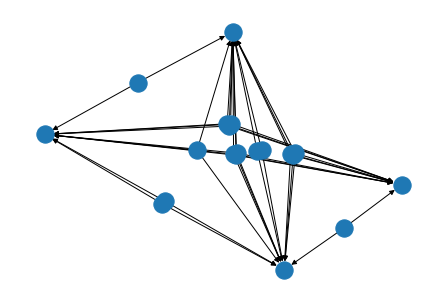

In [5]:
nx_graph = generate_network_from_coeff_df(coeff_df)
nt = Network('500px', '500px')
nt.from_nx(nx_graph)
nx.draw(nx_graph)


In [7]:
nt.show('nx.html')